## Linear Regression Assignment
### Geely Auto Price Modelling

### Reading and Understanding the Data

In [25]:
# Importing all required packages
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
import warnings
warnings.filterwarnings('ignore')
# Set pretty printing format for floats
pd.set_option('float_format', '{:.3f}'.format)
# To view all columns
pd.set_option('display.max_columns', 999)

In [27]:
# Reading the data into a dataframe
cardata_df = pd.read_csv('CarPrice_Assignment.csv')
cardata_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


In [28]:
# fixing the column names to convert them into lowercase
cardata_df.columns = cardata_df.columns.str.strip().str.lower()

#### Inspecting the various aspects of the data

In [29]:
# looking at the shape
cardata_df.shape

(205, 26)

In [30]:
# looking at the column sizes and datatypes
cardata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_id              205 non-null int64
symboling           205 non-null int64
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [31]:
# looking at the statistical information about the data
cardata_df.describe()

,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


### Data Cleaning

In [32]:
# checking if there are any duplicate rows
len(cardata_df[cardata_df.duplicated(subset='car_id')].index)

0

In [33]:
# checking for column-wise missing value percentages
round(cardata_df.isnull().sum()/len(cardata_df.index), 2)*100

car_id             0.000
symboling          0.000
carname            0.000
fueltype           0.000
aspiration         0.000
doornumber         0.000
carbody            0.000
drivewheel         0.000
enginelocation     0.000
wheelbase          0.000
carlength          0.000
carwidth           0.000
carheight          0.000
curbweight         0.000
enginetype         0.000
cylindernumber     0.000
enginesize         0.000
fuelsystem         0.000
boreratio          0.000
stroke             0.000
compressionratio   0.000
horsepower         0.000
peakrpm            0.000
citympg            0.000
highwaympg         0.000
price              0.000
dtype: float64

#### It can be seen that all the rows are unique, and there are no missing values for any column

### Data understanding using visualization

In [34]:
# since car_id  is just a serial number, it can be dropped.
# Doing it at this stage will reduce the number of numeric variables and hence make the pairplot clearer
cardata_df.drop(['car_id'], axis =1, inplace = True)

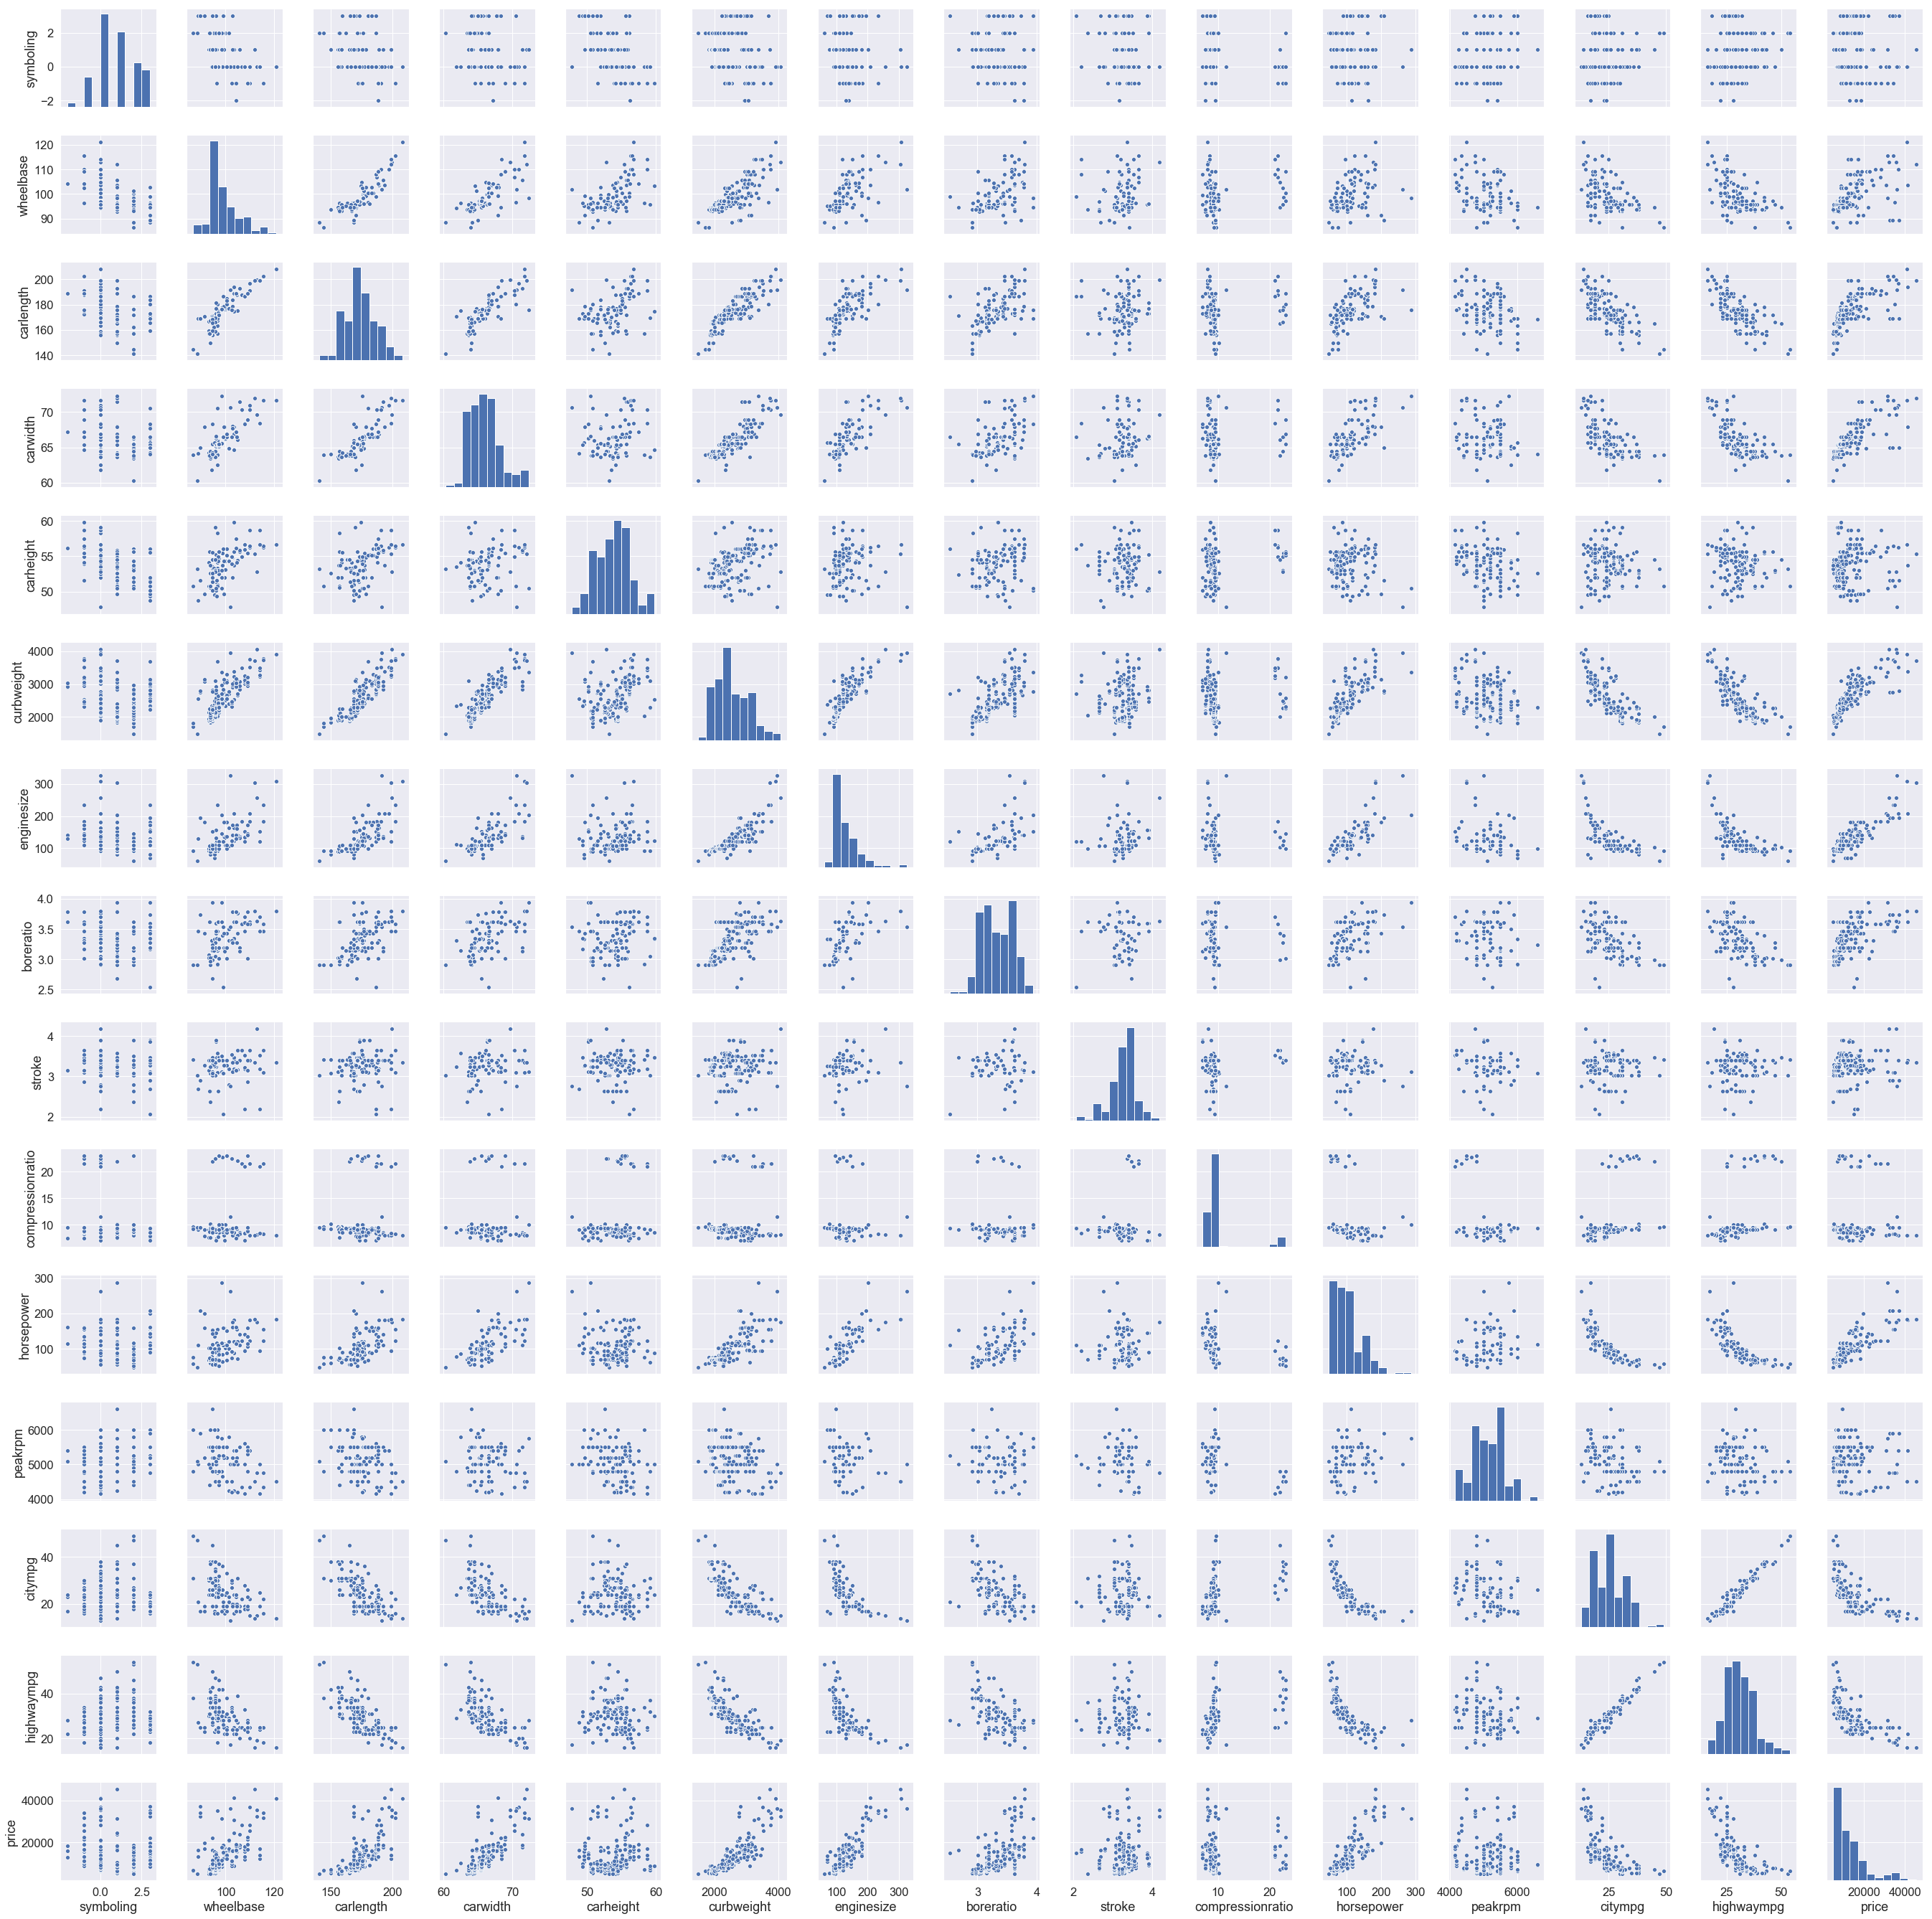

In [35]:
sns.set(font_scale=1.5)
sns.pairplot(cardata_df)
plt.show()

#### One clear observatoin from the above pairplot is that citympg and highwaympg are highly corelated.
#### carlength, carwidth, carheight, curbweight and wheelbase are dimensional attributes of the car and are likely to be corelated. We can plot a pairplot with just these variables for a better understanding

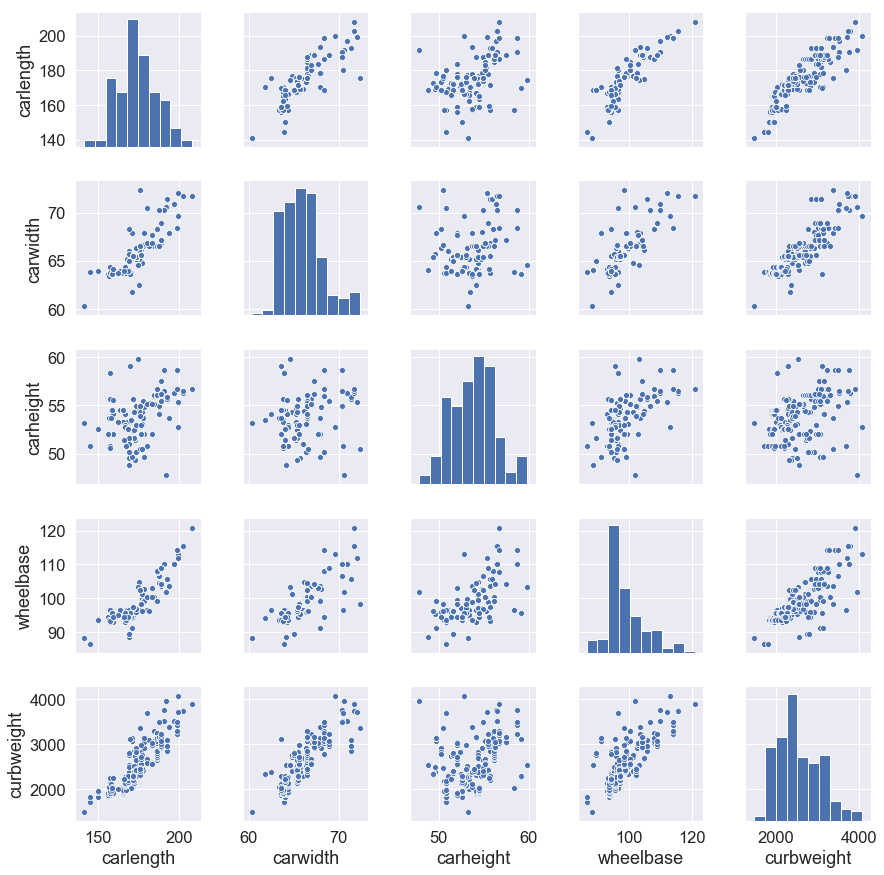

In [36]:
sns.pairplot(cardata_df[['carlength','carwidth','carheight','wheelbase','curbweight']])
plt.show()

#### It can be observed that carlength varies almost linearly with carwidth, curbweigh, and wheelbase. carheight doesn't seem to have much of a relation though. We will now ascertain the above observations by using a heatmap.

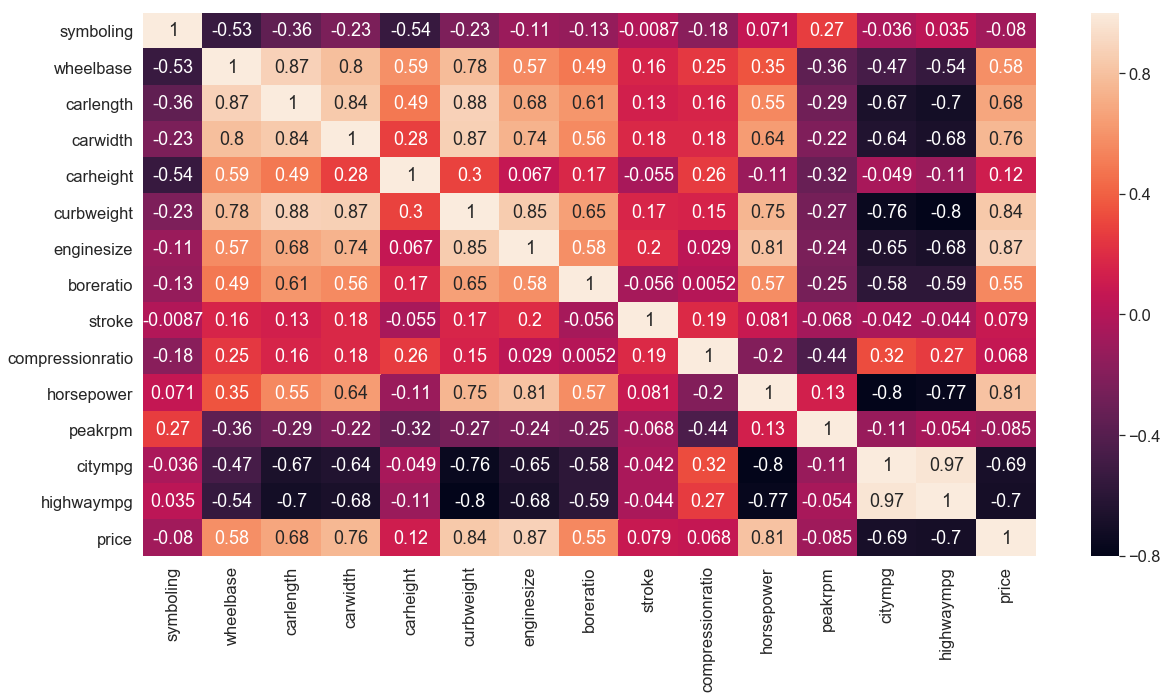

In [37]:
plt.figure(figsize = (20,10))  
sns.heatmap(cardata_df.corr(),annot = True)

#### It can be seen from the above heatmap, that carlength, carwidth, curbweight, and wheelbase are highly corelated. Also, citympg and highwaympg have a high value for corelation.

### Data preparation and data cleanup

In [38]:
# columns with high corelations can be dropped keeping only one of them.
cardata_df.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)

In [39]:
# cleaning the variable carname.
# first checking the unique values that carname has.
cardata_df.carname.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [40]:
# some names have an underscore ('-'), and some don't.
#replacing the underscore with a space (' ') first, and then stripping out the first part, i.e. the name of the car company
cardata_df['carname'] = cardata_df.carname.str.replace('-', ' ')
cardata_df['carname'] = cardata_df.carname.map(lambda x: x.split(' ', 1)[0])
cardata_df.carname.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [41]:
# it can be seen that there are some redundant values.
# vw, vokswagen and volkswagen all stand for volkswagen. toyota and toyouta both stand for toyota
# cleaning such redundancies.
cardata_df['carname'] = cardata_df.carname.str.lower()
cardata_df['carname'] = cardata_df.carname.str.replace('maxda','mazda')
cardata_df['carname'] = cardata_df.carname.str.replace('porcshce','porsche')
cardata_df['carname'] = cardata_df.carname.str.replace('toyouta','toyota')
cardata_df['carname'] = cardata_df.carname.str.replace('vokswagen','volkswagen')
cardata_df['carname'] = cardata_df.carname.str.replace('vw','volkswagen')

cardata_df.carname.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [42]:
# treating categorical variables
# in a quick glance through the data, it can be observed that there are a few variables with only two unique values
print(cardata_df.fueltype.unique())
print(cardata_df.aspiration.unique())
print(cardata_df.doornumber.unique())
print(cardata_df.enginelocation.unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['front' 'rear']


In [43]:
# these variables can be processed and the value can be converted to 0's and 1's
cardata_df['fueltype'] = cardata_df.fueltype.map({'gas': 1, 'diesel': 0})
cardata_df['aspiration'] = cardata_df.aspiration.map({'std': 1, 'turbo': 0})
cardata_df['doornumber'] = cardata_df.doornumber.map({'two': 1, 'four': 0})
cardata_df['enginelocation'] = cardata_df.enginelocation.map({'front': 1, 'rear': 0})

In [44]:
cardata_df.head()

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,1,1,1,convertible,rwd,1,168.800,48.800,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,13495.000
1,3,alfa,1,1,1,convertible,rwd,1,168.800,48.800,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,16500.000
2,1,alfa,1,1,1,hatchback,rwd,1,171.200,52.400,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,16500.000
3,2,audi,1,1,0,sedan,fwd,1,176.600,54.300,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,13950.000
4,2,audi,1,1,0,sedan,4wd,1,176.600,54.300,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,17450.000


In [45]:
# there are a few categorical variables with more than 2 levels, checking the unique values for them.
print(cardata_df.carname.unique())
print(cardata_df.carbody.unique())
print(cardata_df.drivewheel.unique())
print(cardata_df.enginetype.unique())
print(cardata_df.cylindernumber.unique())
print(cardata_df.fuelsystem.unique())

['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [46]:
# we can create dummy variables for above categorical variables, also, since we need n-1 variables to explain n levels,
# we will use dropFirst = True
carname_d = pd.get_dummies(cardata_df.carname, prefix='carname', drop_first = True)
carbody_d = pd.get_dummies(cardata_df.carbody, prefix='carbody', drop_first = True)
drivewheel_d = pd.get_dummies(cardata_df.drivewheel, prefix='drivewheel', drop_first = True)
enginetype_d = pd.get_dummies(cardata_df.enginetype, prefix='enginetype', drop_first = True)
cylindernumber_d = pd.get_dummies(cardata_df.cylindernumber, prefix='cylinderno', drop_first = True)
fuelsystem_d = pd.get_dummies(cardata_df.fuelsystem, prefix='fuelsystem', drop_first = True)

# concatenating the dummy variables to the main dataframe
cardata_df = pd.concat([cardata_df, carname_d, carbody_d, drivewheel_d, enginetype_d, cylindernumber_d, fuelsystem_d], axis = 1)

# Since we have created the dummy variables, we can drop the primary columns

cardata_df.drop(['carname', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], axis = 1, inplace = True)

cardata_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carname_audi,carname_bmw,carname_buick,carname_chevrolet,carname_dodge,carname_honda,carname_isuzu,carname_jaguar,carname_mazda,carname_mercury,carname_mitsubishi,carname_nissan,carname_peugeot,carname_plymouth,carname_porsche,carname_renault,carname_saab,carname_subaru,carname_toyota,carname_volkswagen,carname_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylinderno_five,cylinderno_four,cylinderno_six,cylinderno_three,cylinderno_twelve,cylinderno_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,168.800,48.800,130,3.470,2.680,9.000,111,5000,21,13495.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,168.800,48.800,130,3.470,2.680,9.000,111,5000,21,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,171.200,52.400,152,2.680,3.470,9.000,154,5000,19,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,176.600,54.300,109,3.190,3.400,10.000,102,5500,24,13950.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,176.600,54.300,136,3.190,3.400,8.000,115,5500,18,17450.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [60]:
cardata_train, cardata_test = train_test_split(cardata_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features
Using MinMax scaling.

In [61]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

# scaling all the numeric variables except the categorical variables

num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','price']

cardata_train[num_vars] = scaler.fit_transform(cardata_train[num_vars])

cardata_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carname_audi,carname_bmw,carname_buick,carname_chevrolet,carname_dodge,carname_honda,carname_isuzu,carname_jaguar,carname_mazda,carname_mercury,carname_mitsubishi,carname_nissan,carname_peugeot,carname_plymouth,carname_porsche,carname_renault,carname_saab,carname_subaru,carname_toyota,carname_volkswagen,carname_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylinderno_five,cylinderno_four,cylinderno_six,cylinderno_three,cylinderno_twelve,cylinderno_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.600,1,1,0,1,0.426,0.265,0.140,0.230,0.525,0.150,0.083,0.551,0.500,0.069,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,1.000,1,1,1,1,0.452,0.212,0.340,1.000,0.465,0.156,0.396,0.551,0.167,0.467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.600,1,1,1,1,0.449,0.425,0.140,0.444,0.449,0.150,0.267,1.000,0.361,0.122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.000,1,1,1,1,0.450,0.088,0.260,0.627,0.247,0.125,0.262,0.347,0.222,0.314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,0.200,1,0,0,1,0.776,0.858,0.260,0.746,0.485,0.031,0.475,0.388,0.111,0.382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Divinding X and Y datasets for model building

In [62]:
y_train = cardata_train.pop('price')
x_train = cardata_train

### Building the model using RFE now.

In [64]:
#  Running RFE with the output number of the variables equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [65]:
# checking the columns selected by RFE
x_train.columns[rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'carname_bmw',
       'carname_buick', 'carname_peugeot', 'carname_porsche', 'enginetype_l',
       'enginetype_rotor', 'cylinderno_five', 'cylinderno_four',
       'cylinderno_three', 'cylinderno_twelve', 'cylinderno_two'],
      dtype='object')

In [66]:
# dropping the columns not selected by RFE
col = x_train.columns[~rfe.support_]
x_train = x_train.drop(col,1)

### Building model using statsmodel, for the detailed statistics

In [67]:
# adding a constant
x_train_lm = sm.add_constant(x_train)
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.18e-61
Time:                        16:43:39   Log-Likelihood:                 190.66
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     129   BIC:                            -311.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2091      0.04

In [68]:
# checking the vif for the model built above
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
6,carname_peugeot,inf
8,enginetype_l,inf
9,enginetype_rotor,inf
12,cylinderno_three,inf
14,cylinderno_two,inf
1,enginesize,65.360
2,boreratio,39.790
3,stroke,36.240
0,carlength,28.230
11,cylinderno_four,25.780


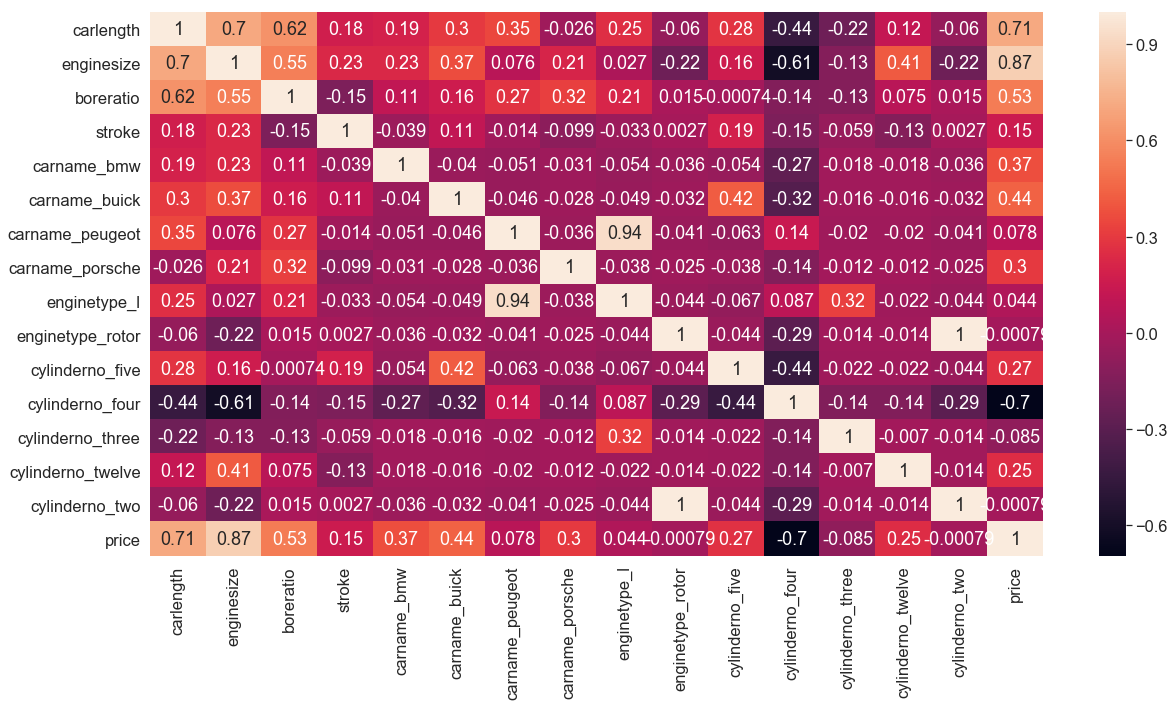

In [69]:
# creating a heatmap of variables that are left and price
plt.figure(figsize = (20,10))  
sns.heatmap(pd.concat([x_train,y_train], axis = 1).corr(),annot = True)

In [70]:
# dropping 'enginetype_rotor' since it has a corelation of 1 with cylinderno_two
x_train_lm = x_train_lm.drop(['enginetype_rotor'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.18e-61
Time:                        16:43:41   Log-Likelihood:                 190.66
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     129   BIC:                            -311.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2091      0.04

In [71]:
# calculating the vif again
x_train = x_train.drop(['enginetype_rotor'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
6,carname_peugeot,inf
8,enginetype_l,inf
11,cylinderno_three,inf
1,enginesize,65.360
2,boreratio,39.790
3,stroke,36.240
0,carlength,28.230
10,cylinderno_four,25.780
13,cylinderno_two,3.820
12,cylinderno_twelve,3.080


In [72]:
# 'carname_peugeot' has a high vif. dropping it.
x_train_lm = x_train_lm.drop(['carname_peugeot'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.18e-61
Time:                        16:43:41   Log-Likelihood:                 190.66
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     129   BIC:                            -311.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2091      0.04

In [73]:
# calculating the vif again
x_train = x_train.drop(['carname_peugeot'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,65.360
2,boreratio,39.790
3,stroke,36.240
0,carlength,28.230
9,cylinderno_four,25.780
12,cylinderno_two,3.820
11,cylinderno_twelve,3.080
8,cylinderno_five,2.760
5,carname_buick,1.790
7,enginetype_l,1.490


In [74]:
# from the above heatmap we can see that 'enginetype_l' has high corelation with 'cylinderno_three'.
# Also, the p-value is high
# dropping 'enginetype_l'
x_train_lm = x_train_lm.drop(['enginetype_l'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     111.7
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.54e-62
Time:                        16:43:42   Log-Likelihood:                 190.40
No. Observations:                 143   AIC:                            -354.8
Df Residuals:                     130   BIC:                            -316.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1977      0.04

In [75]:
# calculating the vif again
x_train = x_train.drop(['enginetype_l'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,64.770
2,boreratio,39.790
3,stroke,35.980
8,cylinderno_four,25.760
0,carlength,25.200
11,cylinderno_two,3.800
10,cylinderno_twelve,3.080
7,cylinderno_five,2.720
5,carname_buick,1.790
6,carname_porsche,1.450


In [76]:
# 'boreratio' is highly corelated to 'enginesize' and 'carlength'. Also, it has a high vif. dropping this column
x_train_lm = x_train_lm.drop(['boreratio'], axis=1)
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.70e-59
Time:                        16:43:42   Log-Likelihood:                 180.07
No. Observations:                 143   AIC:                            -336.1
Df Residuals:                     131   BIC:                            -300.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1110      0.04

In [77]:
# calculating the vif again
x_train = x_train.drop(['boreratio'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,28.950
0,carlength,23.660
2,stroke,16.560
7,cylinderno_four,8.650
6,cylinderno_five,2.180
9,cylinderno_twelve,2.000
10,cylinderno_two,1.830
4,carname_buick,1.640
5,carname_porsche,1.350
3,carname_bmw,1.230


In [78]:
# the vif values have decreased but we can see that 'cylinderno_four' has a high p-value of 0.9.
# dropping 'cylinderno_four' and building the model again

x_train_lm = x_train_lm.drop(['cylinderno_four'], axis=1)
# building the model again
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.45e-60
Time:                        16:43:42   Log-Likelihood:                 180.06
No. Observations:                 143   AIC:                            -338.1
Df Residuals:                     132   BIC:                            -305.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1072      0.02

In [79]:
# calculating the vif again
x_train = x_train.drop(['cylinderno_four'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,14.150
0,carlength,13.870
2,stroke,7.090
8,cylinderno_twelve,1.630
4,carname_buick,1.590
6,cylinderno_five,1.370
5,carname_porsche,1.250
3,carname_bmw,1.210
9,cylinderno_two,1.160
7,cylinderno_three,1.030


In [80]:
# stroke has a high p-value, higher than 5 vif and it is highly corelated to 'enginesize' and 'carlength'. dropping this column
x_train_lm = x_train_lm.drop(['stroke'], axis=1)
# building the model again
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 01 May 2019   Prob (F-statistic):           4.76e-61
Time:                        16:43:43   Log-Likelihood:                 179.17
No. Observations:                 143   AIC:                            -338.3
Df Residuals:                     133   BIC:                            -308.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1334      0.01

In [81]:
# calculating the vif again
x_train = x_train.drop(['stroke'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,13.200
0,carlength,11.010
3,carname_buick,1.510
7,cylinderno_twelve,1.480
5,cylinderno_five,1.360
4,carname_porsche,1.230
2,carname_bmw,1.160
8,cylinderno_two,1.130
6,cylinderno_three,1.000


In [82]:
# 'cylinderno_twelve' has a high p-value, it is highly corelated to 'enginesize' and 'carlength'. dropping this column
x_train_lm = x_train_lm.drop(['cylinderno_twelve'], axis=1)
# building the model again
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 01 May 2019   Prob (F-statistic):           5.36e-62
Time:                        16:43:43   Log-Likelihood:                 178.80
No. Observations:                 143   AIC:                            -339.6
Df Residuals:                     134   BIC:                            -312.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1323      0.018  

In [83]:
# calculating the vif again
x_train = x_train.drop(['cylinderno_twelve'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,9.070
0,carlength,8.430
3,carname_buick,1.430
5,cylinderno_five,1.360
4,carname_porsche,1.150
2,carname_bmw,1.120
7,cylinderno_two,1.100
6,cylinderno_three,1.000


In [84]:
# cylinderno_three has a high p-value and low corelation with price, dropping this column
x_train_lm = x_train_lm.drop(['cylinderno_three'], axis=1)
# building the model again
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     161.8
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.01e-62
Time:                        16:43:43   Log-Likelihood:                 177.08
No. Observations:                 143   AIC:                            -338.2
Df Residuals:                     135   BIC:                            -314.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1244      0.017     

In [85]:
# calculating the vif again
x_train = x_train.drop(['cylinderno_three'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,enginesize,9.070
0,carlength,8.430
3,carname_buick,1.430
5,cylinderno_five,1.360
4,carname_porsche,1.150
2,carname_bmw,1.120
6,cylinderno_two,1.100


In [86]:
# 'carlength' has a high vif and a higher corelation with price than the corelation between 'enginesize' and 'price'. dropping it.
x_train_lm = x_train_lm.drop(['carlength'], axis=1)
# building the model again
# Running the linear model
lm = sm.OLS(y_train,x_train_lm).fit()
# printing the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.20e-59
Time:                        16:43:44   Log-Likelihood:                 167.52
No. Observations:                 143   AIC:                            -321.0
Df Residuals:                     136   BIC:                            -300.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0693      0.013     

In [87]:
# calculating the vif again
x_train = x_train.drop(['carlength'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,enginesize,1.400
2,carname_buick,1.350
4,cylinderno_five,1.290
1,carname_bmw,1.120
3,carname_porsche,1.080
5,cylinderno_two,1.000


### Residual Analysis of the train data

In [88]:
y_train_price = lm.predict(x_train_lm)

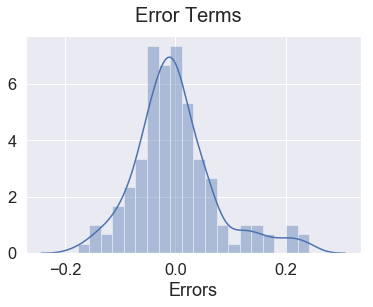

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
_ = sns.distplot((y_train - y_train_price), bins = 20)
_ = fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
_ = plt.xlabel('Errors', fontsize = 18)                         # X-label

###  Making Predictions Using the Final Model

In [90]:
cardata_test[num_vars] = scaler.transform(cardata_test[num_vars])

In [91]:
cardata_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carname_audi,carname_bmw,carname_buick,carname_chevrolet,carname_dodge,carname_honda,carname_isuzu,carname_jaguar,carname_mazda,carname_mercury,carname_mitsubishi,carname_nissan,carname_peugeot,carname_plymouth,carname_porsche,carname_renault,carname_saab,carname_subaru,carname_toyota,carname_volkswagen,carname_volvo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylinderno_five,cylinderno_four,cylinderno_six,cylinderno_three,cylinderno_twelve,cylinderno_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000
mean,0.584,0.887,0.823,0.435,0.968,0.559,0.560,0.266,0.557,0.544,0.209,0.249,0.393,0.328,0.239,0.032,0.032,0.048,0.000,0.048,0.065,0.016,0.000,0.065,0.016,0.065,0.065,0.048,0.048,0.032,0.000,0.048,0.016,0.194,0.081,0.081,0.081,0.339,0.452,0.097,0.565,0.419,0.000,0.048,0.806,0.048,0.065,0.000,0.032,0.855,0.081,0.000,0.000,0.000,0.258,0.000,0.113,0.016,0.500,0.048,0.016
std,0.272,0.319,0.385,0.500,0.178,0.190,0.216,0.163,0.228,0.161,0.274,0.163,0.192,0.172,0.233,0.178,0.178,0.216,0.000,0.216,0.248,0.127,0.000,0.248,0.127,0.248,0.248,0.216,0.216,0.178,0.000,0.216,0.127,0.398,0.275,0.275,0.275,0.477,0.502,0.298,0.500,0.497,0.000,0.216,0.398,0.216,0.248,0.000,0.178,0.355,0.275,0.000,0.000,0.000,0.441,0.000,0.319,0.127,0.504,0.216,0.127
min,0.000,0.000,0.000,0.000,0.000,0.057,0.142,0.068,-0.111,-0.061,0.000,0.017,0.000,0.028,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.400,1.000,1.000,0.000,1.000,0.459,0.385,0.177,0.405,0.485,0.094,0.107,0.265,0.167,0.092,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.600,1.000,1.000,0.000,1.000,0.548,0.588,0.226,0.563,0.586,0.125,0.219,0.347,0.306,0.159,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000
75%,0.800,1.000,1.000,1.000,1.000,0.720,0.699,0.316,0.746,0.641,0.150,0.296,0.541,0.444,0.317,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.750,0.000,0.000,0.000,1.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.089,1.062,0.932,0.889,0.864,1.000,0.662,1.000,0.694,1.113,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000


In [92]:
y_test = cardata_test.pop('price')
x_test = cardata_test

In [93]:
# dropping the columns dropped during the model building
x_test = x_test[x_train.columns]
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)

In [94]:
# Making predictions
y_pred = lm.predict(x_test)

### Model Evaluation

Text(0, 0.5, 'y_pred')

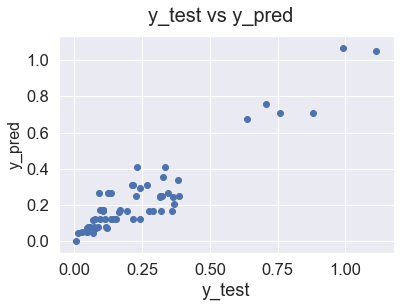

In [95]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Calculating the R2 Score

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8759577019599882